In [56]:
import os
import numpy as np
import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [46]:
class PosterDataset(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        self.items = pd.read_csv(csv_file, sep='\t', header=None, encoding='latin-1')
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.items)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        image_name = os.path.join(self.root_dir, str(self.items.iloc[idx, 0]))+'.png'
        image = io.imread(image_name)
        label = self.items.iloc[idx, 1]
        title = self.items.iloc[idx, 2]
        sample = {'image': image, 'label': label, 'title': title}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

In [42]:
# show image and landmarks
def show_img(image):
    plt.figure()
    plt.imshow(image)
    plt.show()

idx= 0 	img_shape= (1500, 1005, 3) 	label= 3 	title= Toy Story (1995)


<Figure size 432x288 with 0 Axes>

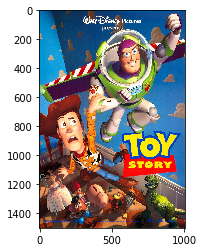

idx= 1 	img_shape= (1500, 1005, 3) 	label= 4 	title= Toy Story (1995)


<Figure size 432x288 with 0 Axes>

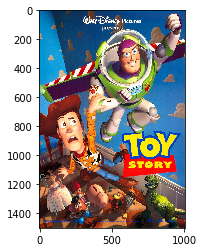

idx= 2 	img_shape= (1500, 1005, 3) 	label= 5 	title= Toy Story (1995)


<Figure size 432x288 with 0 Axes>

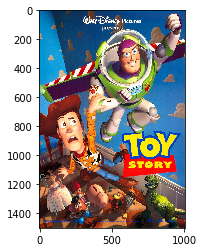

idx= 3 	img_shape= (1023, 682, 3) 	label= 1 	title= GoldenEye (1995)


<Figure size 432x288 with 0 Axes>

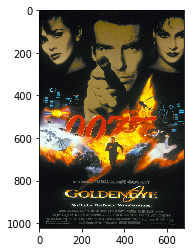

In [48]:
poster_dataset = PosterDataset(csv_file='./data.txt', root_dir='../posters/')
for i in range(len(poster_dataset)):
    sample = poster_dataset[i]
    print('idx=', i, '\timg_shape=', sample['image'].shape, '\tlabel=', sample['label'], '\ttitle=', sample['title'])
    plt.tight_layout()
    show_img(sample['image'])
    
    if i==3:
        break

In [85]:
class Resize(object):

    def __call__(self, sample):
        image, label, title = sample['image'], sample['label'], sample['title']
        new_h, new_w = int(320), int(224)
        img = transform.resize(image, (new_h, new_w))
        return {'image': img, 'label': label, 'title': title}
    
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label, title = sample['image'], sample['label'], sample['title']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image), 'label': label, 'title': title}

<Figure size 432x288 with 0 Axes>

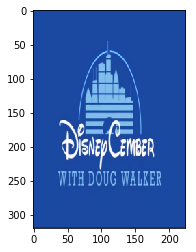

In [71]:
sample = poster_dataset[850]
tsfm = Resize()
transformed_sample = tsfm(sample)

plt.tight_layout()
show_img(transformed_sample['image'])

In [87]:
transformed_dataset = PosterDataset(csv_file='./data.txt',
                                    root_dir='../posters/',
                                    transform=transforms.Compose([
                                        Resize(),
                                        ToTensor()
                                    ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size())

    if i == 3:
        break

0 torch.Size([3, 320, 224])
1 torch.Size([3, 320, 224])
2 torch.Size([3, 320, 224])
3 torch.Size([3, 320, 224])
